In [1]:
import xarray as xr
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import warnings

In [2]:
# !apt-get install -qq libgdal-dev libproj-dev
# #!pip install --no-binary shapely shapely
# !pip install --no-binary shapely shapely --force
# !pip install cartopy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [3]:
ds=xr.open_dataset('/mnt/102ECBA62ECB8368/Academic journey/ML_HEATWAVE/Data/Test/air.2m.gauss.2022.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, time: 365, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2017/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [5]:
ds.lat

<xarray.DataArray 'lat' (lat: 94)>
array([ 88.542   ,  86.6531  ,  84.7532  ,  82.8508  ,  80.9473  ,  79.0435  ,
        77.1394  ,  75.2351  ,  73.3307  ,  71.4262  ,  69.5217  ,  67.6171  ,
        65.7125  ,  63.8079  ,  61.9033  ,  59.9986  ,  58.0939  ,  56.1893  ,
        54.2846  ,  52.3799  ,  50.4752  ,  48.5705  ,  46.6658  ,  44.7611  ,
        42.8564  ,  40.9517  ,  39.047   ,  37.1422  ,  35.2375  ,  33.3328  ,
        31.4281  ,  29.5234  ,  27.6186  ,  25.7139  ,  23.8092  ,  21.9044  ,
        19.9997  ,  18.095   ,  16.1902  ,  14.2855  ,  12.3808  ,  10.47604 ,
         8.57131 ,   6.66657 ,   4.76184 ,   2.8571  ,   0.952368,  -0.952368,
        -2.8571  ,  -4.76184 ,  -6.66657 ,  -8.57131 , -10.47604 , -12.3808  ,
       -14.2855  , -16.1902  , -18.095   , -19.9997  , -21.9044  , -23.8092  ,
       -25.7139  , -27.6186  , -29.5234  , -31.4281  , -33.3328  , -35.2375  ,
       -37.1422  , -39.047   , -40.9517  , -42.8564  , -44.7611  , -46.6658  ,
       -48.5705  , -50.4752  , -52.3799  , -54.2846  , -56.1893  , -58.0939  ,
       -59.9986  , -61.9033  , -63.8079  , -65.7125  , -67.6171  , -69.5217  ,
       -71.4262  , -73.3307  , -75.2351  , -77.1394  , -79.0435  , -80.9473  ,
       -82.8508  , -84.7532  , -86.6531  , -88.542   ], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
Attributes:
    units:          degrees_north
    actual_range:   [ 88.542 -88.542]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [6]:
nbnds=1
desired_time = '2022-01-03T00:00:00.000000000'
temperature_data=ds.sel(nbnds=nbnds,time=desired_time)

In [7]:
temperature_data

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    time       datetime64[ns] 2022-01-03
Data variables:
    air        (lat, lon) float32 ...
    time_bnds  float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2017/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

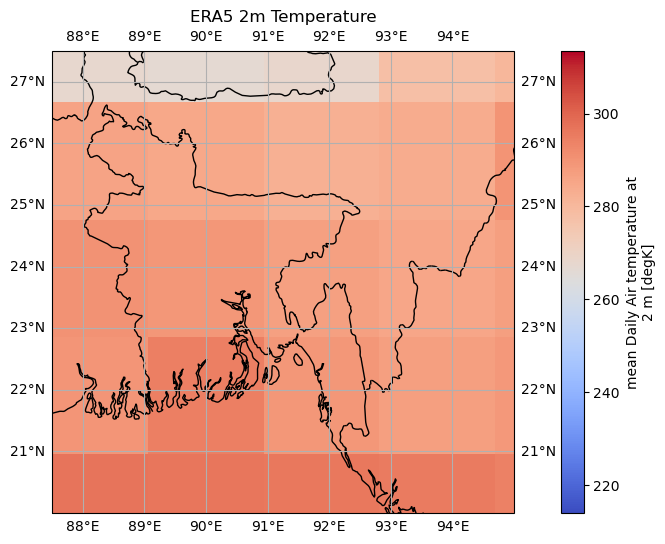

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the projection (PlateCarree for lat/lon data)
projection = ccrs.PlateCarree()

# Create a figure and axis with Cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': projection},figsize=(12,6))

# Plot the temperature data
temperature_data['air'].plot.pcolormesh(ax=ax, transform=projection,cmap='coolwarm')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.BORDERS)
ax.set_extent([87.5,95,27.5, 20])
# Customize plot properties
plt.title('ERA5 2m Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar

ax.set_label('Temperature (K)')

# Show the plot
plt.show()

## Checking the plot after resizing Grid

In [9]:
new_lat = np.arange(-90, 91, 2.5)
new_lon = np.arange(0, 361, 2.5)

# Resample to the new grid size
new_ds = ds.interp(lat=new_lat, lon=new_lon)


In [10]:
nbnds=1
desired_time = '2022-01-03T00:00:00.000000000'
temperature_resized=new_ds.sel(nbnds=nbnds,time=desired_time)

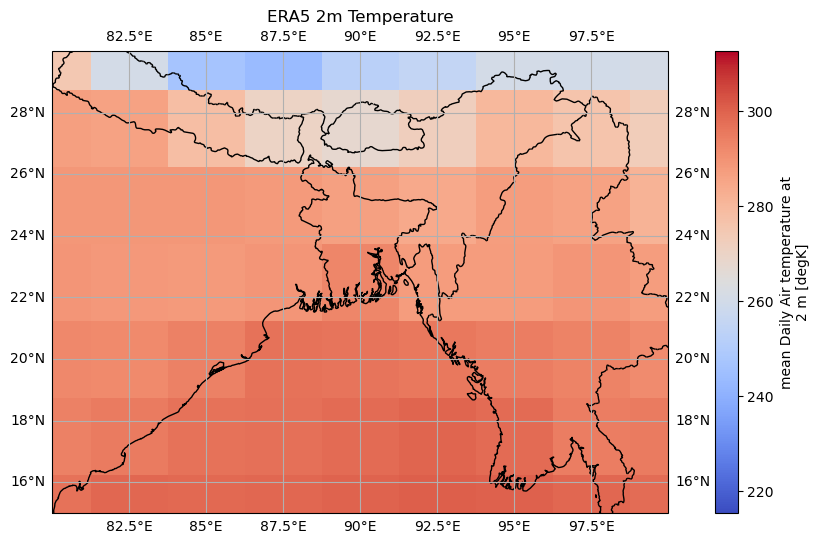

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the projection (PlateCarree for lat/lon data)
projection = ccrs.PlateCarree()

# Create a figure and axis with Cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': projection},figsize=(12,6))

# Plot the temperature data
temperature_resized['air'].plot.pcolormesh(ax=ax, transform=projection,cmap='coolwarm')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.BORDERS)
ax.set_extent([80, 100, 15, 30])
# Customize plot properties
plt.title('ERA5 2m Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar

ax.set_label('Temperature (K)')

# Show the plot
plt.show()